In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from sklearn.metrics import confusion_matrix
import os

Using TensorFlow backend.


In [2]:
mylist= os.listdir('data/')

In [3]:
print(mylist[1])

03-01-01-01-01-01-02.wav


In [4]:
data, sampling_rate = librosa.load('data/03-01-01-01-02-02-09.wav')

Populating the interactive namespace from numpy and matplotlib


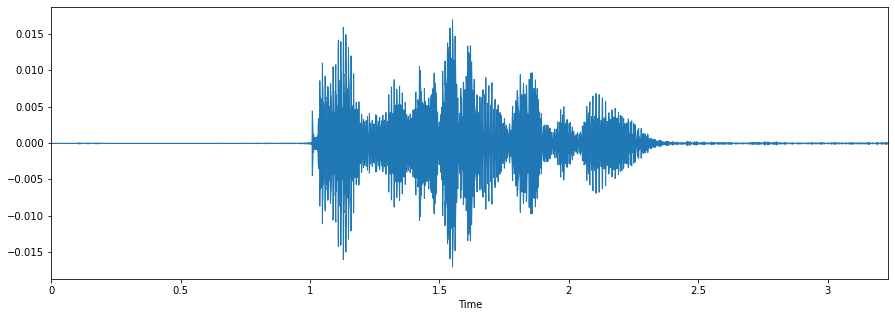

In [5]:
%pylab inline
import pandas as pd
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1  

In [11]:
val = df.feature
val

0      [-70.26777, -70.26777, -70.26777, -70.26777, -...
1      [-65.70765, -65.70765, -63.11472, -61.518997, ...
2      [-65.4825, -65.4825, -65.4825, -65.4825, -65.4...
3      [-64.52845, -64.52845, -64.52845, -64.52845, -...
4      [-62.36431, -59.934727, -61.869602, -67.49577,...
                             ...                        
955    [-31.163713, -28.617666, -24.917967, -24.49493...
956    [-51.8394, -51.8394, -51.8394, -51.8394, -51.8...
957    [-49.289055, -49.289055, -49.04858, -48.87291,...
958    [-57.722847, -57.722847, -57.722847, -57.72284...
959    [-45.345825, -45.345825, -45.345825, -45.34582...
Name: feature, Length: 960, dtype: object

In [49]:
df2 = pd.DataFrame(columns=['mean','median'])
for i in range(len(val)):
    df2.loc[i,'mean'] = val[i].mean()
    df2.loc[i,'median'] = np.median(val[i])
    

In [50]:
df2.describe()

,mean,median
count,960.000000,960.000000
unique,959.000000,959.000000
top,-38.946712,-33.418583
freq,2.000000,2.000000


C:\Users\reddyvs\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


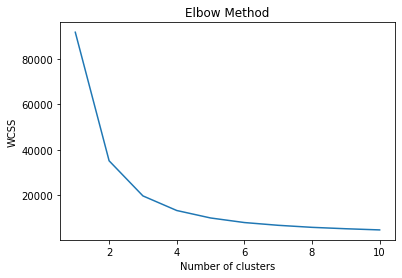

In [51]:
test = df2.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

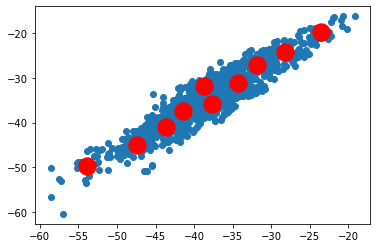

In [53]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(test)
plt.scatter(df2.iloc[:,0],df2.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

In [32]:
test

array([[-43.22366 , -43.22366 ],
       [-41.85352 , -41.85352 ],
       [-35.95256 , -35.95256 ],
       ...,
       [-41.240635, -41.240635],
       [-35.044514, -35.044514],
       [-40.822514, -40.822514]], dtype=float32)

In [33]:
print(val[0])

[-70.26777  -70.26777  -70.26777  -70.26777  -70.26777  -70.26777
 -70.26777  -70.26777  -70.26777  -70.26777  -70.26777  -70.26777
 -70.00066  -69.98083  -70.26777  -70.26777  -70.26777  -70.26777
 -70.26777  -70.26777  -66.09639  -63.39728  -68.259895 -70.26777
 -69.665245 -68.81713  -66.11466  -63.901035 -68.62062  -70.26777
 -69.64199  -68.42016  -70.04418  -67.23247  -66.35039  -68.50346
 -66.57759  -62.98096  -62.693485 -65.90668  -67.47967  -65.50775
 -60.183018 -46.305138 -42.03026  -41.176853 -40.39396  -42.781776
 -41.630405 -42.38596  -35.06297  -29.963026 -27.710716 -28.129292
 -29.228241 -28.922142 -29.863792 -29.13733  -27.562275 -26.559965
 -27.29548  -25.76872  -26.59623  -26.585436 -27.215008 -27.260408
 -29.628487 -28.612772 -29.271511 -29.694263 -30.584787 -31.252563
 -31.215956 -31.923744 -32.84927  -32.42957  -28.261763 -26.577507
 -28.14566  -28.639492 -29.120243 -30.14143  -31.6785   -33.357437
 -36.92599  -37.689625 -38.747364 -39.802963 -36.427456 -34.17576
 -3

In [48]:
print(np.median(val[0]))

-36.58596


In [35]:
df2

,mean,median
0,-43.223660,-43.223660
1,-41.853519,-41.853519
2,-35.952560,-35.952560
3,-46.475098,-46.475098
4,-39.287399,-39.287399
...,...,...
955,-32.022362,-32.022362
956,-29.250870,-29.250870
957,-41.240635,-41.240635
958,-35.044514,-35.044514


In [36]:
df2.iloc[:,0]

0     -43.223660
1     -41.853519
2     -35.952560
3     -46.475098
4     -39.287399
         ...    
955   -32.022362
956   -29.250870
957   -41.240635
958   -35.044514
959   -40.822514
Name: mean, Length: 960, dtype: float32

In [37]:
kmeans.cluster_centers_[:, 1]

array([-39.44477 , -26.270103, -45.257854, -33.230133, -49.01381 ,
       -42.295612, -36.52287 , -22.275723, -30.320024, -54.37446 ],
      dtype=float32)